In [1]:
!python --version

Python 3.11.7


In [2]:
import torch
torch.__version__

'2.4.1+cpu'

In [3]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
# Create image size
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])           
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [6]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Define dataset paths
dataset_dir = r"D:\Medicinal_plant_dataset"
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

# Create 'train' and 'test' directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop through each species in the dataset directory
species_dirs = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

for species in species_dirs:
    species_path = os.path.join(dataset_dir, species)

    # Skip 'train' and 'test' directories
    if species in ['train', 'test']:
        continue

    # Ensure the species directory exists
    if os.path.isdir(species_path):
        images = [img for img in os.listdir(species_path) if not img.startswith('.')]
        
        # Split images into 70% train, 30% test
        train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)
        
        # Create species directory inside 'train' and 'test' directories
        os.makedirs(os.path.join(train_dir, species), exist_ok=True)
        os.makedirs(os.path.join(test_dir, species), exist_ok=True)
        
        # Copy images to the respective directories
        for img in train_images:
            src = os.path.join(species_path, img)
            dest = os.path.join(train_dir, species, img)
            if not os.path.exists(dest):
                shutil.copy2(src, dest)
        
        for img in test_images:
            src = os.path.join(species_path, img)
            dest = os.path.join(test_dir, species, img)
            if not os.path.exists(dest):
                shutil.copy2(src, dest)

print("Dataset preparation completed.")


Dataset preparation completed.


In [7]:
import torch
from glob import glob
import os
import random
from collections import Counter

# Global variables
device = "cuda" if torch.cuda.is_available() else "cpu"
dataset_path = r"D:\Medicinal_plant_dataset"
image_size = (224, 224)

# Get all subdirectory paths in the dataset path
subfolders = [f.path for f in os.scandir(dataset_path) if f.is_dir()]

# Initialize lists to store image paths and labels
image_paths = []
labels = []

# Iterate through each subdirectory
for folder in subfolders:
    # Get all image paths in the current folder
    image_files = glob(os.path.join(folder, "*.jpg"))
    # Assign label based on folder name (e.g., "Normal" or "Stroke")
    label = os.path.basename(folder)
    # Extend the image paths list and labels list
    image_paths.extend(image_files)
    labels.extend([label] * len(image_files))

# Combine the paths and labels into a list of tuples for shuffling
data = list(zip(image_paths, labels))
random.shuffle(data)

# Unzip the data
image_paths, labels = zip(*data)

# Get unique classes and their counts
class_counts = Counter(labels)
classes = list(class_counts.keys())
num_classes = len(classes)

# Print the list of classes and their counts
print(f"Classes: {classes}")
print(f"Number of classes: {num_classes}")
print("Class counts:")
for class_name, count in class_counts.items():
    print(f"  {class_name}: {count} images")

# Split the data into training and testing sets
train_ratio = 0.8  # 80% for training, 20% for testing
train_size = int(train_ratio * len(image_paths))
train_paths = image_paths[:train_size]
test_paths = image_paths[train_size:]
train_labels = labels[:train_size]
test_labels = labels[train_size:]

# Check device
print(device)

# Print the number of images in each set for verification
print(f"Total images: {len(image_paths)}")
print(f"Training set size: {len(train_paths)}")
print(f"Testing set size: {len(test_paths)}")

Classes: ['Nooni', 'Avacado', 'Mango', 'Ekka', 'Aloevera', 'Bamboo', 'Rose', 'Sapota', 'Amla', 'Pepper', 'Lemon', 'Curry_Leaf', 'Jasmine', 'Doddapatre', 'Neem', 'Nithyapushpa', 'Pomegranate', 'Hibiscus', 'Gauva', 'Raktachandini', 'Betel_Nut', 'Wood_sorel', 'Ashwagandha', 'Nagadali', 'Castor', 'Brahmi', 'Basale', 'Insulin', 'Tulasi', 'Betel', 'Amruta_Balli', 'Mint', 'Geranium', 'Henna', 'Ashoka', 'Honge', 'Pappaya', 'Lemon_grass', 'Ganike', 'Arali']
Number of classes: 40
Class counts:
  Nooni: 146 images
  Avacado: 146 images
  Mango: 146 images
  Ekka: 146 images
  Aloevera: 164 images
  Bamboo: 146 images
  Rose: 168 images
  Sapota: 146 images
  Amla: 146 images
  Pepper: 146 images
  Lemon: 146 images
  Curry_Leaf: 146 images
  Jasmine: 187 images
  Doddapatre: 146 images
  Neem: 146 images
  Nithyapushpa: 146 images
  Pomegranate: 146 images
  Hibiscus: 165 images
  Gauva: 146 images
  Raktachandini: 146 images
  Betel_Nut: 146 images
  Wood_sorel: 146 images
  Ashwagandha: 146 ima

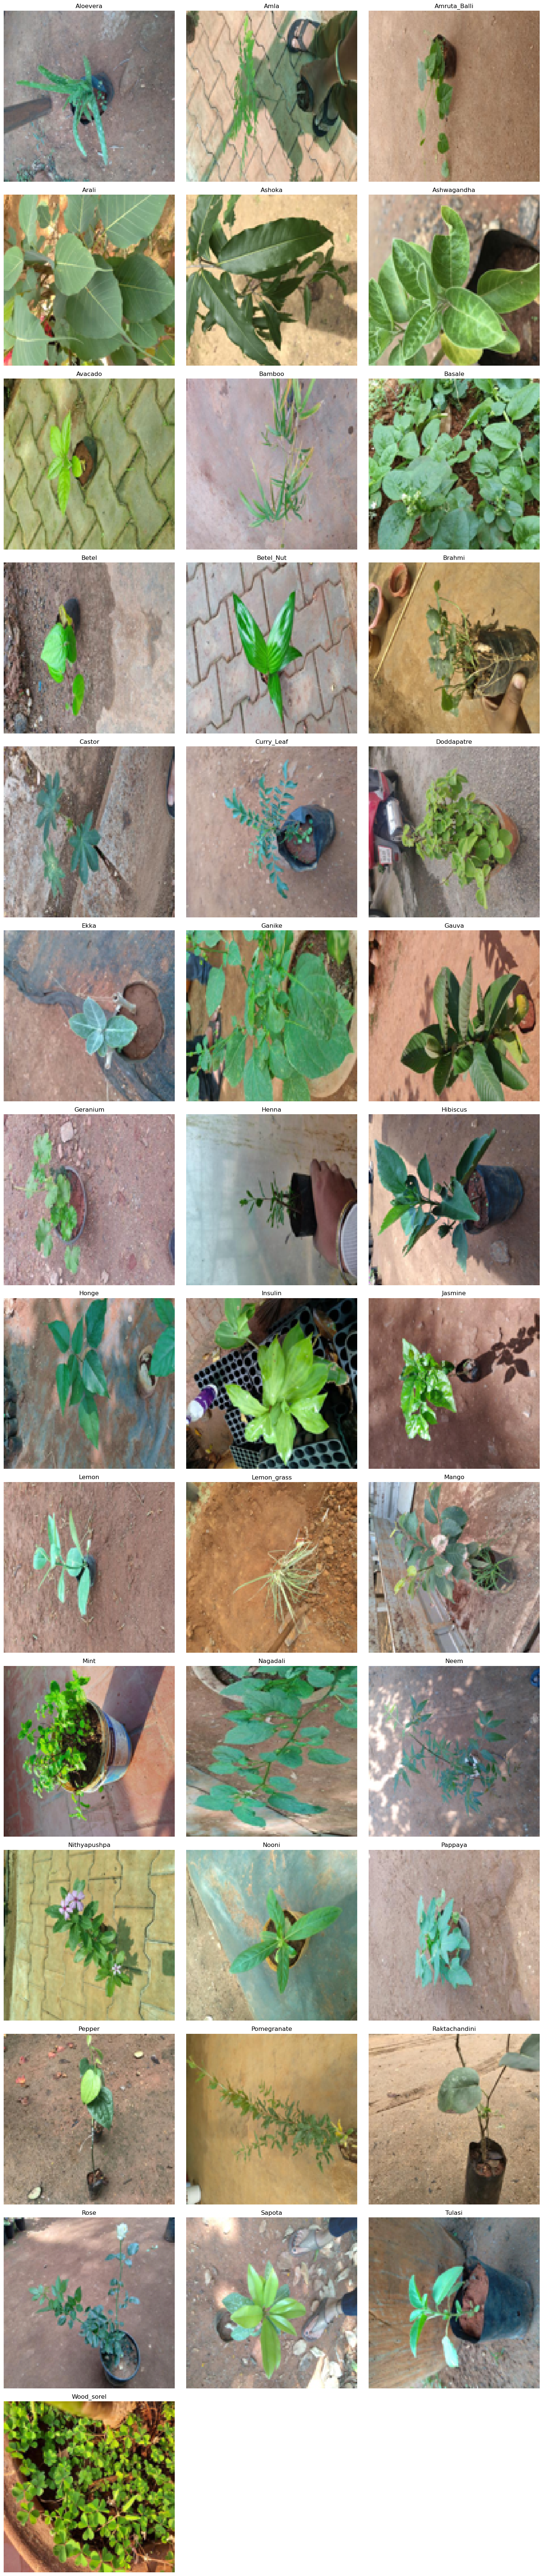

In [8]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set dataset directory path
dataset_dir = r"D:\Medicinal_plant_dataset"

# Number of images to display per class
images_per_class = 1

# Desired size for all images (width, height)
image_size = (128, 128)  # Resize all images to 128x128 pixels

# Collect images from each class
data = []

for label in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(class_dir):
        class_images = []
        for filename in os.listdir(class_dir):
            file_path = os.path.join(class_dir, filename)
            if os.path.isfile(file_path):
                class_images.append((file_path, label))
            if len(class_images) >= images_per_class:
                break
        data.extend(class_images)

# Determine number of rows and columns for the grid
num_images = len(data)
cols = 3  # Number of columns in the grid
rows = (num_images // cols) + (num_images % cols != 0)  # Calculate number of rows needed

# Display images in a grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for i, (file_path, label) in enumerate(data):
    img = Image.open(file_path)            # Load image using PIL
    img = img.resize(image_size)           # Resize image to 128x128 pixels
    
    row = i // cols
    col = i % cols
    axes[row, col].imshow(img)             # Display image in the grid
    axes[row, col].axis('off')             # Turn off axis
    axes[row, col].set_title(label)        # Set label as the title

# Turn off any unused subplots
for j in range(i+1, rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()



Found 5945 images belonging to 40 classes.


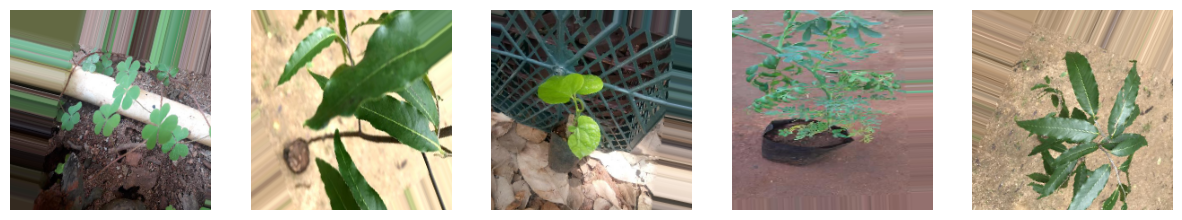

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your training directory
train_dir = r'D:\train'

# Define image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Create ImageDataGenerator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create the train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Fetch a batch of augmented images from the generator
augmented_images, _ = next(train_generator)

# Plot the images
plt.figure(figsize=(15, 10))

# Display 5 augmented images
for i in range(5):
    img = augmented_images[i]  # Select an image from the batch
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


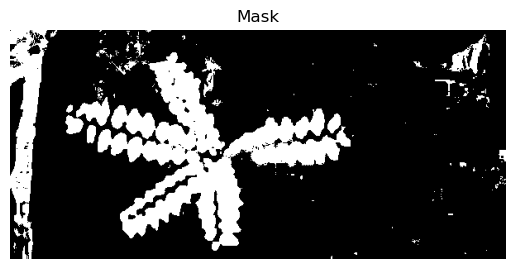

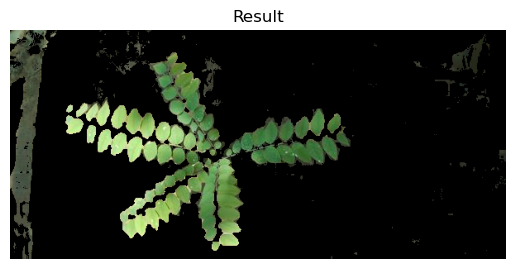

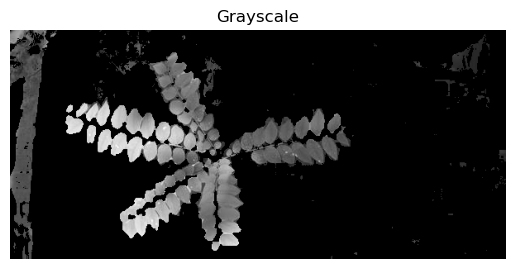

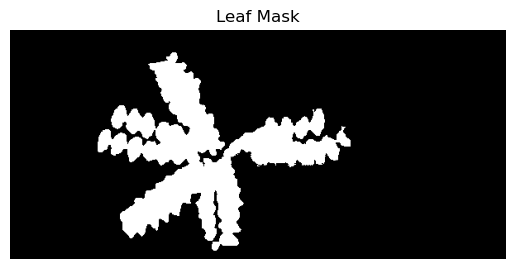

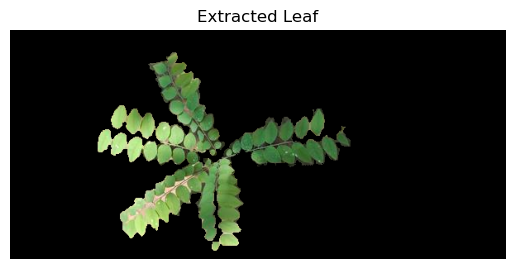

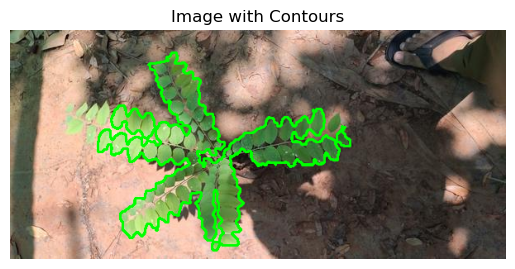

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set the image path (single image, not a directory)
image_path = r"D:\Medicinal_plant_dataset\Amla\547.jpg"

# Function to extract and display the leaf region
def extract_and_display_leaf(image_path):
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to read image: {image_path}")
        return

    # Convert to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define range for green color (adjust these values for your specific images)
    lower_green = np.array([30, 40, 40])
    upper_green = np.array([90, 255, 255])

    # Create a mask for the green color
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Display the mask
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')
    plt.show()

    # Bitwise-AND mask and original image
    result = cv2.bitwise_and(img, img, mask=mask)

    # Display the result of applying the mask
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title('Result')
    plt.axis('off')
    plt.show()

    # Convert to grayscale and apply thresholding to create a binary image
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Display the grayscale image
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')
    plt.show()

    # Find contours of the leaf
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask to keep only the largest contour (the leaf)
    leaf_mask = np.zeros_like(gray)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        cv2.drawContours(leaf_mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Display the leaf mask
    plt.imshow(leaf_mask, cmap='gray')
    plt.title('Leaf Mask')
    plt.axis('off')
    plt.show()

    # Apply the mask to the original image
    leaf_extracted = cv2.bitwise_and(img, img, mask=leaf_mask)

    # Convert the image from BGR to RGB for displaying with matplotlib
    leaf_extracted_rgb = cv2.cvtColor(leaf_extracted, cv2.COLOR_BGR2RGB)

    # Display the extracted leaf
    plt.imshow(leaf_extracted_rgb)
    plt.title('Extracted Leaf')
    plt.axis('off')
    plt.show()

    # Draw contours on the original image
    img_with_contours = img.copy()
    cv2.drawContours(img_with_contours, [largest_contour], -1, (0, 255, 0), 2)

    # Convert to RGB for displaying with matplotlib
    img_with_contours_rgb = cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB)

    # Display the image with contours
    plt.imshow(img_with_contours_rgb)
    plt.title('Image with Contours')
    plt.axis('off')
    plt.show()

# Call the function to process the single image
extract_and_display_leaf(image_path)


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Vision Transformer (ViT) model
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

def create_vit_classifier(input_shape, num_classes, patch_size=16, projection_dim=64, num_heads=4, transformer_layers=8, mlp_head_units=[2048, 1024]):
    # Input layer
    inputs = layers.Input(shape=input_shape)
    
    # Create patches
    patch_size = patch_size
    patches = layers.Conv2D(projection_dim, kernel_size=patch_size, strides=patch_size, padding='valid')(inputs)
    patches = layers.Reshape((-1, projection_dim))(patches)

    # Positional embedding
    num_patches = patches.shape[1]
    position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)
    positions = tf.range(start=0, limit=num_patches, delta=1)
    embedded_positions = position_embedding(positions)
    encoded_patches = patches + embedded_positions

    # Transformer layers
    for _ in range(transformer_layers):
        # Layer normalization 1
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Multi-head attention
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim, dropout=0.1)(x1, x1)
        # Skip connection 1
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP
        x3 = mlp(x3, hidden_units=[projection_dim * 2, projection_dim], dropout_rate=0.1)
        # Skip connection 2
        encoded_patches = layers.Add()([x3, x2])

    # Classification head
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    logits = layers.Dense(num_classes)(features)

    # Create the Keras model
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

# Parameters for the ViT model
input_shape = (224, 224, 3)
num_classes = 10  # Adjust based on the number of classes

# Create the Vision Transformer model
vit_model = create_vit_classifier(input_shape, num_classes)

# Compile the model
vit_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                  loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Summary of the ViT model
vit_model.summary()






Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 14, 14, 64)           49216     ['input_1[0][0]']             
                                                                                                  
 reshape (Reshape)           (None, 196, 64)              0         ['conv2d[0][0]']              
                                                                                                  
 tf.__operators__.add (TFOp  (None, 196, 64)              0         ['reshape[0][0]']             
 Lambda)                                                                                     

2/2 [==============================] - 4s 2s/step


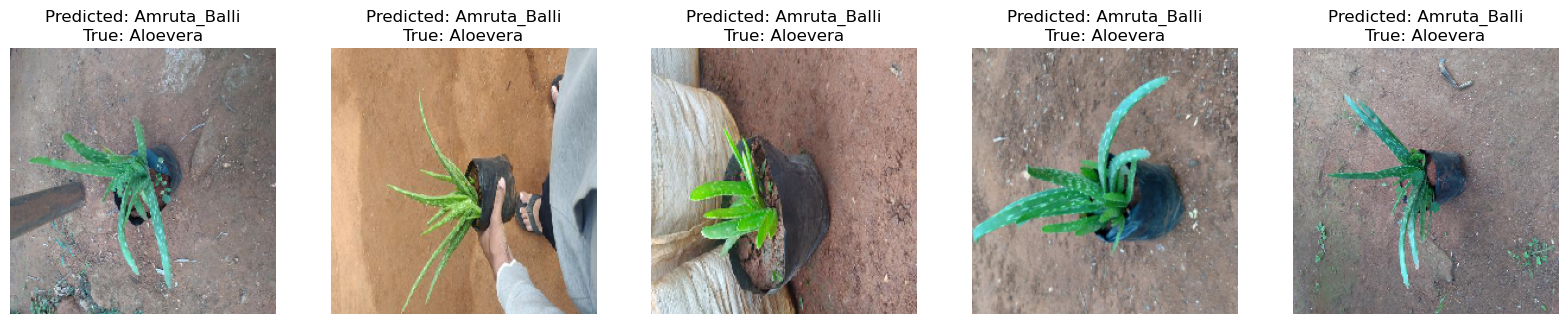

In [20]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Dataset directory path
dataset_dir = r"D:\Medicinal_plant_dataset"

# Class names: Ensure all class names are included based on your dataset directory
class_names = ['Aloevera', 'Amla', 'Amruta_Balli', 'Arali','Tulasi']

# Function to load images from the directory and resize them
def load_and_preprocess_images(image_dir, target_size=(224, 224), num_images=None):
    images = []
    labels = []
    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(image_dir, class_name)
        for i, filename in enumerate(os.listdir(class_dir)):
            if num_images and i >= num_images:
                break
            image_path = os.path.join(class_dir, filename)
            img = load_img(image_path, target_size=target_size)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(class_idx)
    images = np.array(images) / 255.0  # Normalize images to [0, 1] range
    labels = np.array(labels)
    return images, labels

# Load a small batch of images for prediction (e.g., 10 images from each class)
test_images, test_labels = load_and_preprocess_images(dataset_dir, num_images=10)

# Assuming vit_model is your Vision Transformer (ViT) model
# Get predictions from the ViT model
predictions = vit_model.predict(test_images)

# Convert logits to class probabilities and class labels
predicted_class_indices = np.argmax(predictions, axis=1)

# Ensure that the predicted indices and labels don't go out of range for the class_names list
num_images_to_display = min(len(test_images), len(predicted_class_indices), len(class_names))

# Plot the images and predicted labels
plt.figure(figsize=(20, 20))
for i in range(num_images_to_display):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {class_names[predicted_class_indices[i]]}\nTrue: {class_names[test_labels[i]]}")
    plt.axis('off')

plt.show()


In [19]:
from keras.preprocessing.image import ImageDataGenerator

# Assuming you have defined the paths to your training and testing data
train_data_dir = r"D:\train"
test_data_dir = r"D:\test"

# Create an instance of ImageDataGenerator for the training and test datasets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),  # Change this based on your model's input size
    batch_size=32,
    class_mode='categorical'  # Change if you're using binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 5945 images belonging to 40 classes.
Found 5945 images belonging to 40 classes.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Path to your dataset
dataset_dir = r"D:\Medicinal_plant_dataset"

## Visualize a few random images from a species directory
species = 'Curry_Leaf'  # Example species
species_path = os.path.join(dataset_dir, species)
images = os.listdir(species_path)
#
## Select a few images to display
sample_images = images[:5]

plt.figure(figsize=(15, 10))

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(species_path, img_name)
    img = mpimg.imread(img_path)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"{species} - {img_name}")
    plt.axis('off')

plt.show()





In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load and preprocess images
def load_and_preprocess_images(dataset_dir, num_images=10):
    # Filter out common image file extensions
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']
    
    # List image paths with valid extensions
    image_paths = "D:\test\Amruta_Balli\147.jpg"
    
    # Print out the image paths to verify
    print(f"Image paths: {image_paths}")
    
    if len(image_paths) == 0:
        raise ValueError("No valid images found in the directory. Please check the path or file extensions.")
    
    images = [load_img(img_path, target_size=(224, 224)) for img_path in image_paths]
    images = np.array([img_to_array(img) for img in images]) / 255.0  # Normalize
    return images

# Example usage:
test_data_dir = "D:\test\Amruta_Balli" # Ensure this is the correct path
test_images = load_and_preprocess_images(test_data_dir, num_images=10)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# CNN Modelimport tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import os

# Set paths to your dataset directories
train_data_dir = r"D:\train"
test_data_dir = r"D:\test"    # Replace with your test data path

# Data generators with image rescaling and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Adjust based on your model's input size
    batch_size=32,
    class_mode='categorical'  # Change if you have binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Use number of classes from train_generator
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(train_generator, validation_data=test_generator, epochs=5)

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_generator)
print(f"CNN Test Loss: {cnn_loss}")
print(f"CNN Test Accuracy: {cnn_accuracy}")

# Confusion Matrix for CNN
def load_and_preprocess_images(dataset_dir, num_images=10):
    # Load images from directory
    image_paths = [os.path.join(dataset_dir, fname) for fname in os.listdir(dataset_dir)][:num_images]
    images = [tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224)) for img_path in image_paths]
    images = np.array([tf.keras.preprocessing.image.img_to_array(img) for img in images]) / 255.0  # Normalize
    return images

# Replace 'test_data_dir' with the directory where test images are stored
test_images = load_and_preprocess_images(test_data_dir, num_images=10)
cnn_predictions = cnn_model.predict(test_images)
cnn_pred_classes = np.argmax(cnn_predictions, axis=1)

# Replace this with your actual labels for test images
# This is just an example; you need to load the true labels accordingly
test_labels = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Replace with actual labels

cnn_conf_matrix = confusion_matrix(test_labels, cnn_pred_classes)
print("Confusion Matrix for CNN:")
print(cnn_conf_matrix)

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')  # len(class_names) = number of classes
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(train_generator, validation_data=test_generator, epochs=5)

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_generator)
print(f"CNN Test Loss: {cnn_loss}")
print(f"CNN Test Accuracy: {cnn_accuracy}")

# Confusion Matrix for CNN
test_images, test_labels = load_and_preprocess_images(dataset_dir, num_images=5)
cnn_predictions = cnn_model.predict(test_images)
cnn_pred_classes = np.argmax(cnn_predictions, axis=1)

cnn_conf_matrix = confusion_matrix(test_labels, cnn_pred_classes)
print("Confusion Matrix for CNN:")
print(cnn_conf_matrix)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np
from sklearn.metrics import confusion_matrix

# Define the test data directory
test_data_dir = r"D:\test"  # Replace with the actual path to your test data

# Function to load and preprocess images
def load_and_preprocess_images(dataset_dir, num_images=10):
    # Filter out only image files (jpg, jpeg, png) from the directory
    valid_extensions = ['.jpg', '.jpeg', '.png']
    
    image_paths = [
        os.path.join(dataset_dir, fname) 
        for fname in os.listdir(dataset_dir) 
        if os.path.splitext(fname)[1].lower() in valid_extensions
    ][:num_images]
    
    images = [load_img(img_path, target_size=(224, 224)) for img_path in image_paths]
    images = np.array([img_to_array(img) for img in images]) / 255.0  # Normalize
    
    return images

# Load and preprocess the test images
test_images = load_and_preprocess_images(test_data_dir, num_images=10)

# Assuming 'cnn_model' is already defined and trained
cnn_predictions = cnn_model.predict(test_images)
cnn_pred_classes = np.argmax(cnn_predictions, axis=1)

# Replace this with your actual labels for test images
test_labels = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Example, replace with actual labels

# Confusion matrix for CNN predictions
cnn_conf_matrix = confusion_matrix(test_labels, cnn_pred_classes)
print("Confusion Matrix for CNN:")
print(cnn_conf_matrix)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import os

# Set paths to your dataset directories
train_data_dir = r"D:\train"  # Replace with your train data path
test_data_dir = r"D:\test"    # Replace with your test data path

# Data generators with image rescaling and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Adjust based on your model's input size
    batch_size=32,
    class_mode='categorical'  # Change if you have binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# RNN Model
model = Sequential([
    TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=(None, 224, 224, 3)),
    TimeDistributed(MaxPooling2D(pool_size=(2, 2))),
    
    TimeDistributed(Conv2D(64, (3, 3), activation='relu')),
    TimeDistributed(MaxPooling2D(pool_size=(2, 2))),
    
    TimeDistributed(Conv2D(128, (3, 3), activation='relu')),
    TimeDistributed(MaxPooling2D(pool_size=(2, 2))),
    
    TimeDistributed(Flatten()),
    LSTM(128),  # LSTM layer for RNN
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Use number of classes from train_generator
])

# Compile the RNN model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_history = model.fit(train_generator, validation_data=test_generator, epochs=5)

# Evaluate RNN model
model_loss, model_accuracy = model.evaluate(test_generator)
print(f"RNN Test Loss: {model_loss}")
print(f"RNN Test Accuracy: {model_accuracy}")

# Confusion Matrix for RNN
def load_and_preprocess_images(dataset_dir, num_images=10):
    # Load images from directory
    image_paths = [os.path.join(dataset_dir, fname) for fname in os.listdir(dataset_dir)][:num_images]
    images = [tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224)) for img_path in image_paths]
    images = np.array([tf.keras.preprocessing.image.img_to_array(img) for img in images]) / 255.0  # Normalize
    return images

# Replace 'test_data_dir' with the directory where test images are stored
test_images = load_and_preprocess_images(test_data_dir, num_images=10)
# For RNN input, we need to reshape test_images to include a time dimension
test_images = np.expand_dims(test_images, axis=1)  # Adding a time dimension
rnn_predictions = model.predict(test_images)
rnn_pred_classes = np.argmax(rnn_predictions, axis=1)

# Replace this with your actual labels for test images
# This is just an example; you need to load the true labels accordingly
test_labels = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Replace with actual labels

rnn_conf_matrix = confusion_matrix(test_labels, rnn_pred_classes)
print("Confusion Matrix for RNN:")
print(rnn_conf_matrix)


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load the MobileNetV2 base model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers
model_mobilenet = Sequential([
    mobilenet_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

# Compile the MobileNet model
model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the MobileNet model
mobilenet_history = model_mobilenet.fit(train_generator, validation_data=test_generator, epochs=10)

# Evaluate MobileNet model
mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(test_generator)
print(f"MobileNet Test Loss: {mobilenet_loss}")
print(f"MobileNet Test Accuracy: {mobilenet_accuracy}")

# Confusion Matrix for MobileNet
mobilenet_predictions = model_mobilenet.predict(test_images)
mobilenet_pred_classes = np.argmax(mobilenet_predictions, axis=1)

mobilenet_conf_matrix = confusion_matrix(test_labels, mobilenet_pred_classes)
print("Confusion Matrix for MobileNet:")
print(mobilenet_conf_matrix)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# For CNN (example shown here, repeat for RNN and MobileNet)

# Get CNN predictions
cnn_pred_classes = np.argmax(cnn_predictions, axis=1)

# Confusion Matrix
cnn_conf_matrix = confusion_matrix(test_labels, cnn_pred_classes)
print("Confusion Matrix:")
print(cnn_conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cnn_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for CNN")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print("Classification Report for CNN:")
print(classification_report(test_labels, cnn_pred_classes, target_names=class_names))


In [ ]:
# Plot Accuracy and Loss for CNN
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Vision Transformer (ViT) model
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

def create_vit_classifier(input_shape, num_classes, patch_size=16, projection_dim=64, num_heads=4, transformer_layers=8, mlp_head_units=[2048, 1024]):
    # Input layer
    inputs = layers.Input(shape=input_shape)
    
    # Create patches
    patch_size = patch_size
    patches = layers.Conv2D(projection_dim, kernel_size=patch_size, strides=patch_size, padding='valid')(inputs)
    patches = layers.Reshape((-1, projection_dim))(patches)

    # Positional embedding
    num_patches = patches.shape[1]
    position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)
    positions = tf.range(start=0, limit=num_patches, delta=1)
    embedded_positions = position_embedding(positions)
    encoded_patches = patches + embedded_positions

    # Transformer layers
    for _ in range(transformer_layers):
        # Layer normalization 1
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Multi-head attention
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim, dropout=0.1)(x1, x1)
        # Skip connection 1
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP
        x3 = mlp(x3, hidden_units=[projection_dim * 2, projection_dim], dropout_rate=0.1)
        # Skip connection 2
        encoded_patches = layers.Add()([x3, x2])

    # Classification head
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    logits = layers.Dense(num_classes)(features)

    # Create the Keras model
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

# Parameters for the ViT model
input_shape = (224, 224, 3)
num_classes = 10  # Adjust based on the number of classes

# Create the Vision Transformer model
vit_model = create_vit_classifier(input_shape, num_classes)

# Compile the model
vit_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                  loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Summary of the ViT model
vit_model.summary()



